Notebook Content:
- Create spark DataFrame.
- Filter the dataframe.
- Groupby specific column/s.
- Creating dataframe schema.
- Handling the null values.
- Combine operations.

In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import count

In [2]:
# Craete sparksession
spark = SparkSession.builder.getOrCreate()
# Create sparkcontext
sc = spark.sparkContext

**Create DataFrame**

In [3]:
# Spark dataframes are immutable
df1 = spark.createDataFrame([("Brooke", 20),
                            ("Denny", 31),
                            ("Jules", 30), 
                            ("TD", 35),
                            ("Brooke", 25)],
                            ["name", "age"])

In [4]:
df1.show()

+------+---+
|  name|age|
+------+---+
|Brooke| 20|
| Denny| 31|
| Jules| 30|
|    TD| 35|
|Brooke| 25|
+------+---+



In [5]:
# Group by names.
# Age mean for each group of names.
from pyspark.sql.functions import avg

mean_ages = df1.groupBy('name').agg(avg('age')).alias('')
# Dataftame will not be displayed untill you call an action operation.
# To see the results use show method.
mean_ages.show()

+------+--------+
|  name|avg(age)|
+------+--------+
|Brooke|    22.5|
| Jules|    30.0|
|    TD|    35.0|
| Denny|    31.0|
+------+--------+



In [6]:
# Read dataframe from file
df2 = spark.read.json('Data\people.json')
df2.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [7]:
# To descover the schema use printSchema method.
df2.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [8]:
# Select a specific column.
# You cannot see the column because select is not an action operation.
df2.select('name')

DataFrame[name: string]

In [9]:
df2.select('name').show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [10]:
df2.filter('age > 25').show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [11]:
# Create another dataframe
df3 = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], 
    schema=['color', 'fruit', 'v1', 'v2'])

In [12]:
df3.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



In [13]:
df3.groupBy('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
|black|    6.0|   60.0|
| blue|    3.0|   30.0|
+-----+-------+-------+



In [14]:
df3.groupby(['color', 'fruit']).agg(avg('v1')).show()

+-----+------+-------+
|color| fruit|avg(v1)|
+-----+------+-------+
| blue| grape|    4.0|
|black|carrot|    6.0|
|  red|banana|    4.0|
|  red| grape|    8.0|
|  red|carrot|    4.0|
| blue|banana|    2.0|
+-----+------+-------+



In [15]:
# All the last created spark dataframe are already schemas defined.
# But what if we need to define the schema by ourselves.
# To create a schema we need spark sql types.
from pyspark.sql.types import *

In [16]:
# To create a dataframe first we need to define the data and its schema.
# 1) Define the data.
data = [
    ['Will', 'Steven', 23, 0.41], 
    ['Ann', 'Bob', 25, 0.32], 
    ['Max', 'Bill', 33, 0.45],
    ['George', 'Willsten', 43, 0.41], 
    ['Raf', 'Jobs', 35, 0.35], 
    ['Ben', 'Alex', 36, 0.26],
    ['Lili', 'Wanderson', 37, 0.47], 
    ['Geo', '__', 28, 0.38]
]

In [17]:
# 2) define the schema
# Thers are many ways to define the schema.
# First: Programmatical way like the below one.
schema = StructType([StructField("First_name", StringType(), False),
                     StructField("Last_name", StringType(), False),
                     StructField("Age", IntegerType(), False),
                     StructField("GBA", DoubleType(), False)])
# Second: Using DDL.
schema = "`First_name` STRING, `Last_name` STRING, `Age` INT, `GBA` FLOAT"

In [18]:
df4 = spark.createDataFrame(data, schema)

In [19]:
df4.show(truncate=True)

+----------+---------+---+----+
|First_name|Last_name|Age| GBA|
+----------+---------+---+----+
|      Will|   Steven| 23|0.41|
|       Ann|      Bob| 25|0.32|
|       Max|     Bill| 33|0.45|
|    George| Willsten| 43|0.41|
|       Raf|     Jobs| 35|0.35|
|       Ben|     Alex| 36|0.26|
|      Lili|Wanderson| 37|0.47|
|       Geo|       __| 28|0.38|
+----------+---------+---+----+



In [20]:
from pyspark.sql.functions import col, concat
df4.withColumn('First_name', col('Age')>30).show()

+----------+---------+---+----+
|First_name|Last_name|Age| GBA|
+----------+---------+---+----+
|     false|   Steven| 23|0.41|
|     false|      Bob| 25|0.32|
|      true|     Bill| 33|0.45|
|      true| Willsten| 43|0.41|
|      true|     Jobs| 35|0.35|
|      true|     Alex| 36|0.26|
|      true|Wanderson| 37|0.47|
|     false|       __| 28|0.38|
+----------+---------+---+----+



In [21]:
df4.withColumn('First_name', concat(col('First_name'),col('Last_name'))).show()

+--------------+---------+---+----+
|    First_name|Last_name|Age| GBA|
+--------------+---------+---+----+
|    WillSteven|   Steven| 23|0.41|
|        AnnBob|      Bob| 25|0.32|
|       MaxBill|     Bill| 33|0.45|
|GeorgeWillsten| Willsten| 43|0.41|
|       RafJobs|     Jobs| 35|0.35|
|       BenAlex|     Alex| 36|0.26|
| LiliWanderson|Wanderson| 37|0.47|
|         Geo__|       __| 28|0.38|
+--------------+---------+---+----+



In [22]:
df4.sort('Age', ascending=False).show()

+----------+---------+---+----+
|First_name|Last_name|Age| GBA|
+----------+---------+---+----+
|    George| Willsten| 43|0.41|
|      Lili|Wanderson| 37|0.47|
|       Ben|     Alex| 36|0.26|
|       Raf|     Jobs| 35|0.35|
|       Max|     Bill| 33|0.45|
|       Geo|       __| 28|0.38|
|       Ann|      Bob| 25|0.32|
|      Will|   Steven| 23|0.41|
+----------+---------+---+----+



In [23]:
# The same result as the above line
df4.sort(df4.GBA.desc()).show()

+----------+---------+---+----+
|First_name|Last_name|Age| GBA|
+----------+---------+---+----+
|      Lili|Wanderson| 37|0.47|
|       Max|     Bill| 33|0.45|
|      Will|   Steven| 23|0.41|
|    George| Willsten| 43|0.41|
|       Geo|       __| 28|0.38|
|       Raf|     Jobs| 35|0.35|
|       Ann|      Bob| 25|0.32|
|       Ben|     Alex| 36|0.26|
+----------+---------+---+----+



In [24]:
# How to deal with null values
Null_df = spark.read.csv('Data\\NullData.csv' ,header=True,inferSchema=True)
Null_df.show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp2| null| null|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [25]:
Null_df.dropna().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [26]:
Null_df.na.drop().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [27]:
# The thresh here is to specify the least number of not null values accepted in each row.
# When the thresh = 1 means you will accept with at least one not null value.
Null_df.dropna(thresh=1).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp2| null| null|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [28]:
Null_df.dropna(thresh=2).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [29]:
Null_df.dropna(thresh=3).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [30]:
Null_df.dropna(subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [31]:
# Filling the nulls
Null_df.fillna('Not Found').show()

+----+---------+-----+
|  Id|     Name|Sales|
+----+---------+-----+
|emp1|     John| null|
|emp2|Not Found| null|
|emp3|Not Found|345.0|
|emp4|    Cindy|456.0|
+----+---------+-----+



In [32]:
Null_df.fillna('Name', subset=['Name']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp2| Name| null|
|emp3| Name|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [33]:
from pyspark.sql.functions import mean
mean_val = Null_df.select(mean(Null_df['Sales'])).collect()
mean_sales = mean_val[0][0]
Null_df.na.fill(mean_sales,subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|400.5|
|emp2| null|400.5|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [34]:
house_df = spark.read.csv('Data\MELBOURNE_HOUSE_PRICES_LESS.csv', header=True, inferSchema=True)
house_df.printSchema()

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)
 |-- Distance: double (nullable = true)
 |-- CouncilArea: string (nullable = true)



In [35]:
# Show the head with two elements.
house_df.take(2)

[Row(Suburb='Abbotsford', Address='49 Lithgow St', Rooms=3, Type='h', Price=1490000, Method='S', SellerG='Jellis', Date='1/04/2017', Postcode=3067, Regionname='Northern Metropolitan', Propertycount=4019, Distance=3.0, CouncilArea='Yarra City Council'),
 Row(Suburb='Abbotsford', Address='59A Turner St', Rooms=3, Type='h', Price=1220000, Method='S', SellerG='Marshall', Date='1/04/2017', Postcode=3067, Regionname='Northern Metropolitan', Propertycount=4019, Distance=3.0, CouncilArea='Yarra City Council')]

In [36]:
# To get the correlation between two columns.
# Here we don't use show method because corr is an action operation so we will the resukt automatically.
house_df.corr('Price', 'Rooms')

0.23073348893709725

In [37]:
house_df.corr('price','Distance')

-0.1692210349960301

In [38]:
from pyspark.sql.functions import when, isnull

house_df.select([count(when(isnull(c), c)).alias(c) for c in house_df.columns]).show()

+------+-------+-----+----+-----+------+-------+----+--------+----------+-------------+--------+-----------+
|Suburb|Address|Rooms|Type|Price|Method|SellerG|Date|Postcode|Regionname|Propertycount|Distance|CouncilArea|
+------+-------+-----+----+-----+------+-------+----+--------+----------+-------------+--------+-----------+
|     0|      0|    0|   0|14590|     0|      0|   0|       0|         0|            0|       0|          0|
+------+-------+-----+----+-----+------+-------+----+--------+----------+-------------+--------+-----------+



In [39]:
# convert spark dataframe to pandas dataframe.
pandas_df = house_df.toPandas()
pandas_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [40]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int32  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int32  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int32  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 5.5+ MB


<AxesSubplot:>

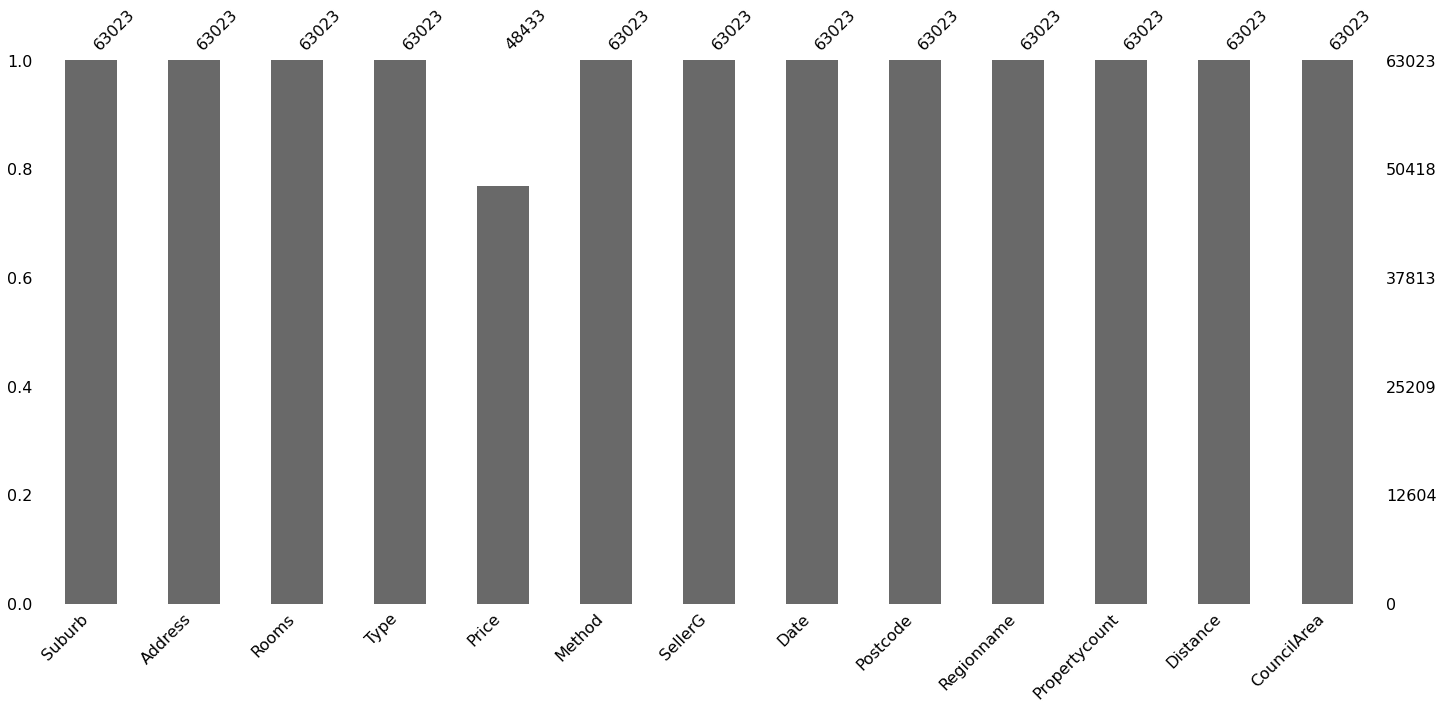

In [41]:
# To visually see the nulls.
import missingno as msno
msno.bar(pandas_df)

<AxesSubplot:>

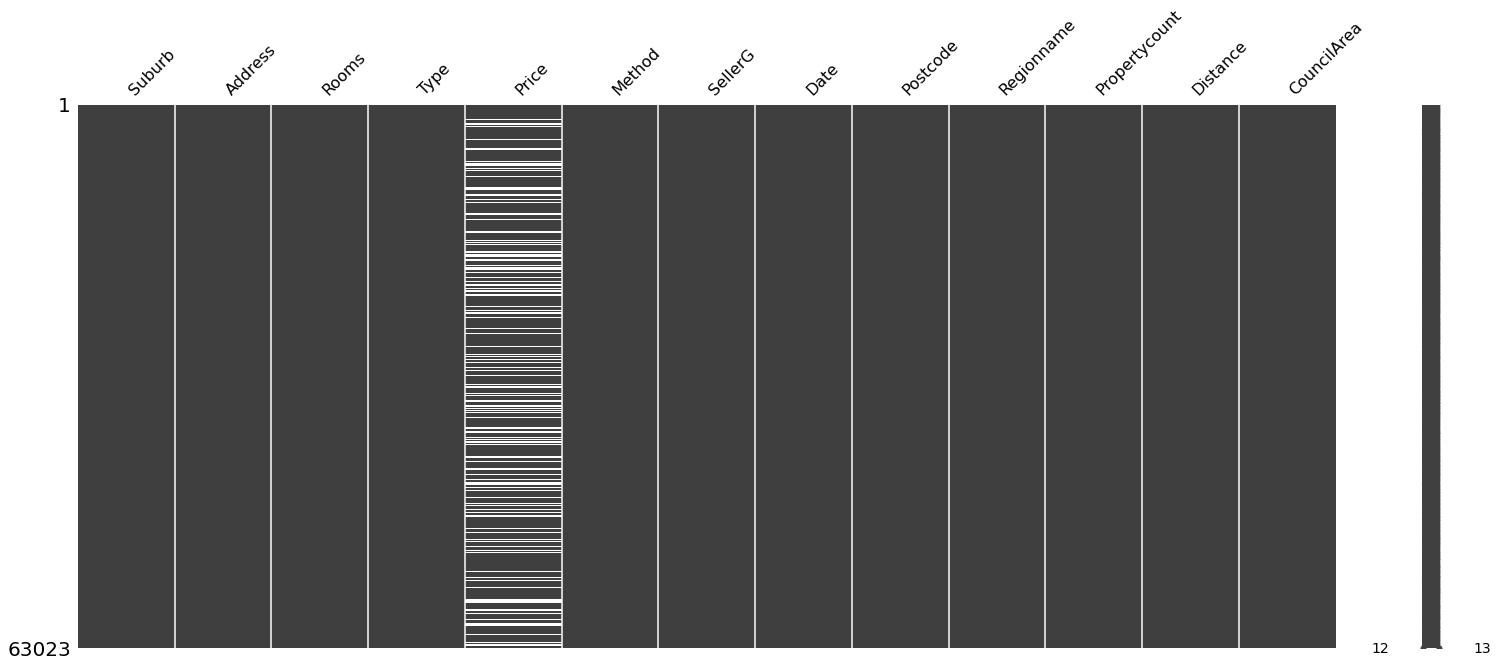

In [42]:
msno.matrix(pandas_df)

In [43]:
# Combine many operations together.
mnm_df = spark.read.format('csv')\
                   .option('header', 'true')\
                   .option('inferSchena', 'true')\
                   .load('Data\mnm_dataset.csv')
mnm_df.show()

+-----+------+-----+
|State| Color|Count|
+-----+------+-----+
|   TX|   Red|   20|
|   NV|  Blue|   66|
|   CO|  Blue|   79|
|   OR|  Blue|   71|
|   WA|Yellow|   93|
|   WY|  Blue|   16|
|   CA|Yellow|   53|
|   WA| Green|   60|
|   OR| Green|   71|
|   TX| Green|   68|
|   NV| Green|   59|
|   AZ| Brown|   95|
|   WA|Yellow|   20|
|   AZ|  Blue|   75|
|   OR| Brown|   72|
|   NV|   Red|   98|
|   WY|Orange|   45|
|   CO|  Blue|   52|
|   TX| Brown|   94|
|   CO|   Red|   82|
+-----+------+-----+
only showing top 20 rows



In [44]:
mnm_df.select('State', 'Count')\
.groupby('State')\
.agg(count('Count').alias('State_Count'))\
.orderBy('State_Count', ascending=False).show()

+-----+-----------+
|State|State_Count|
+-----+-----------+
|   CA|      10164|
|   TX|      10072|
|   WA|      10065|
|   CO|      10051|
|   NM|      10050|
|   NV|      10025|
|   AZ|      10001|
|   OR|       9903|
|   UT|       9886|
|   WY|       9782|
+-----+-----------+



In [45]:
mnm_df.select('State', 'Color', 'Count')\
.where(mnm_df.Count > 68)\
.groupBy('State')\
.agg(avg('Count').alias('Count_AVG'))\
.orderBy('Count_AVG').show()

+-----+-----------------+
|State|        Count_AVG|
+-----+-----------------+
|   NM|84.11104895104896|
|   OR|84.32470520563704|
|   TX|84.35043453882815|
|   CA|84.36048431480462|
|   WA|84.38181818181818|
|   AZ|84.39094056549337|
|   NV|84.43993231810491|
|   WY|84.49854819976771|
|   UT|  84.572611653357|
|   CO|84.61404981808005|
+-----+-----------------+

